In [21]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("../data/used-bikes-cleaned.csv")
X = df.drop(["Price","LogPrice"], axis=1)
y = df["Price"]


In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model_rf = joblib.load("../models/final_rf_pipeline.joblib")
model_xgboost = joblib.load("../models/final_xgb_pipeline.joblib")

In [22]:
y_pred_rf = model_rf.predict(X_test)
y_pred_xgb = model_xgboost.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print(f"Random Forest R²: {r2_rf:.4f} | MAE: {mae_rf:.2f} LKR")
print(f"XGBoost R²: {r2_xgb:.4f} | MAE: {mae_xgb:.2f} LKR")

Random Forest R²: 0.9404 | MAE: 31757.85 LKR
XGBoost R²: 0.8711 | MAE: 59280.96 LKR


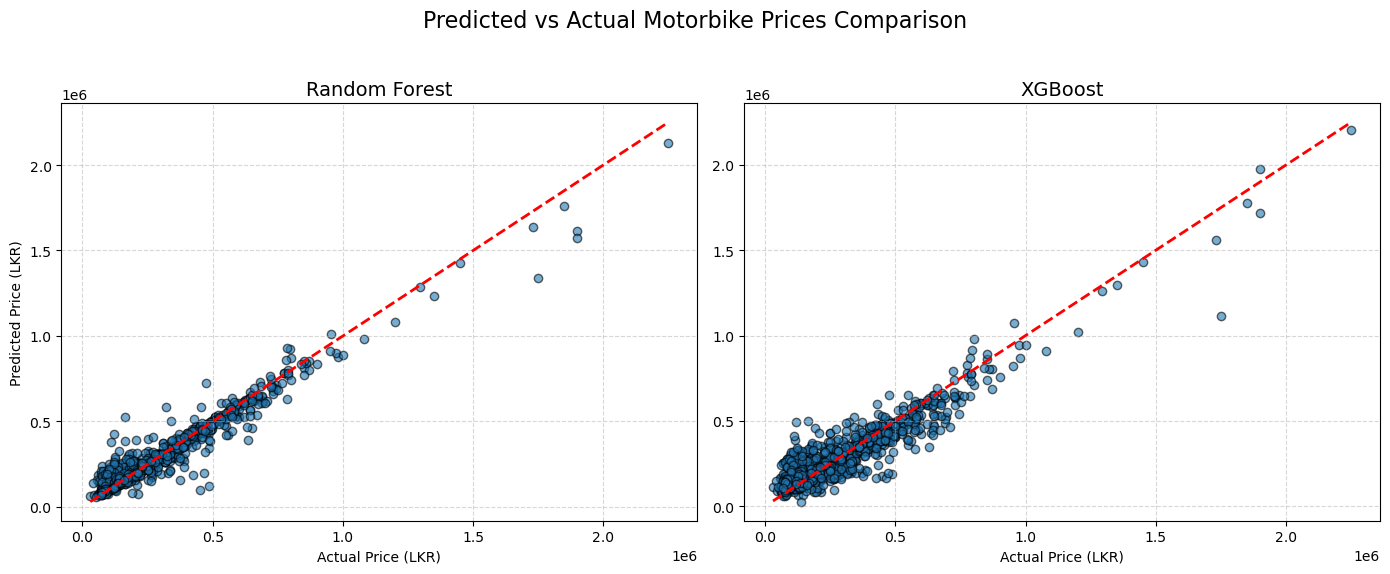

<Figure size 640x480 with 0 Axes>

In [18]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Random Forest ---
axes[0].scatter(y_test, y_pred_rf, alpha=0.6, edgecolor='k')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_title("Random Forest", fontsize=14)
axes[0].set_xlabel("Actual Price (LKR)")
axes[0].set_ylabel("Predicted Price (LKR)")
axes[0].grid(True, linestyle="--", alpha=0.5)

# --- XGBoost ---
axes[1].scatter(y_test, y_pred_xgb, alpha=0.6, edgecolor='k')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_title("XGBoost", fontsize=14)
axes[1].set_xlabel("Actual Price (LKR)")
axes[1].grid(True, linestyle="--", alpha=0.5)

# Adjust layout and show both
plt.suptitle("Predicted vs Actual Motorbike Prices Comparison", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

plt.savefig("../app/screenshots/model_performance.png", dpi=300)

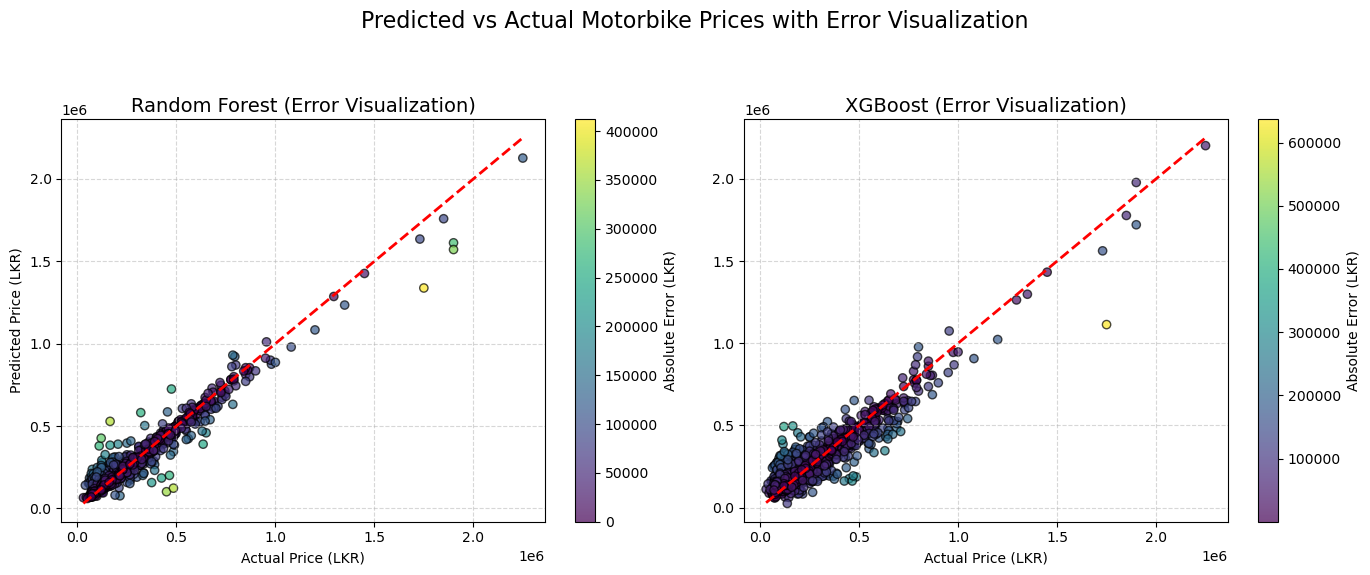

In [19]:
# Calculate absolute errors for both models
errors_rf = np.abs(y_test - y_pred_rf)
errors_xgb = np.abs(y_test - y_pred_xgb)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Random Forest ---
sc1 = axes[0].scatter(y_test, y_pred_rf, c=errors_rf, cmap='viridis', alpha=0.7, edgecolor='k')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_title("Random Forest (Error Visualization)", fontsize=14)
axes[0].set_xlabel("Actual Price (LKR)")
axes[0].set_ylabel("Predicted Price (LKR)")
axes[0].grid(True, linestyle="--", alpha=0.5)
cbar1 = plt.colorbar(sc1, ax=axes[0])
cbar1.set_label("Absolute Error (LKR)")

# --- XGBoost ---
sc2 = axes[1].scatter(y_test, y_pred_xgb, c=errors_xgb, cmap='viridis', alpha=0.7, edgecolor='k')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_title("XGBoost (Error Visualization)", fontsize=14)
axes[1].set_xlabel("Actual Price (LKR)")
axes[1].grid(True, linestyle="--", alpha=0.5)
cbar2 = plt.colorbar(sc2, ax=axes[1])
cbar2.set_label("Absolute Error (LKR)")

# Adjust layout and add a super title
plt.suptitle("Predicted vs Actual Motorbike Prices with Error Visualization", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure (optional for README)
plt.savefig("../app/screenshots/model_error_comparison.png", dpi=300)
plt.show()


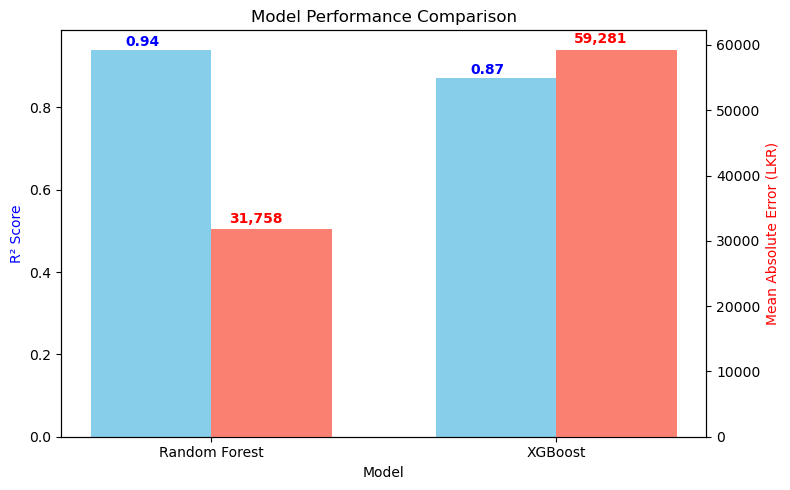

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Example metrics
models = ['Random Forest', 'XGBoost']
r2_scores = [r2_rf, r2_xgb]  # replace with your actual R² values
mae_scores = [mae_rf, mae_xgb]  # replace with your actual MAE values

x = np.arange(len(models))
width = 0.35

fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot R² scores
bars1 = ax1.bar(x - width/2, r2_scores, width, label='R²', color='skyblue')

# Plot MAE on secondary axis
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, mae_scores, width, label='MAE', color='salmon')

# Labels and titles
ax1.set_xlabel('Model')
ax1.set_ylabel('R² Score', color='blue')
ax2.set_ylabel('Mean Absolute Error (LKR)', color='red')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.set_title('Model Performance Comparison')

# Annotate bars
for i, v in enumerate(r2_scores):
    ax1.text(i - 0.25, v + 0.01, f"{v:.2f}", color='blue', fontweight='bold')
for i, v in enumerate(mae_scores):
    ax2.text(i + 0.05, v + 1000, f"{v:,.0f}", color='red', fontweight='bold')

fig.tight_layout()
plt.savefig("../app/screenshots/model_performance_comparison.png", dpi=300)
plt.show()


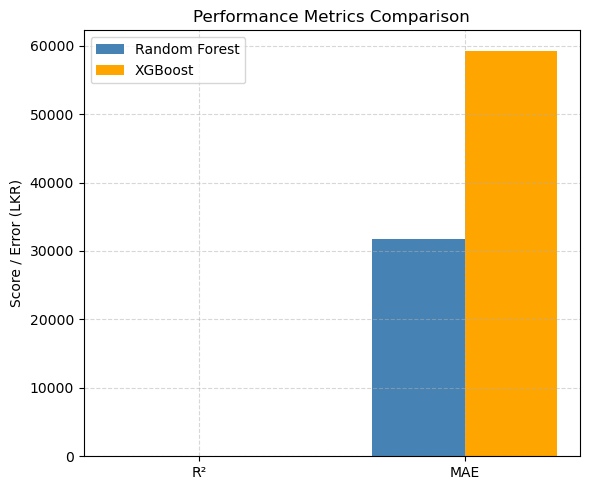

In [25]:
metrics = ['R²', 'MAE']
rf_values = [r2_rf, mae_rf] 
xgb_values = [r2_xgb,mae_xgb]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(6, 5))
ax.bar(x - width/2, rf_values, width, label='Random Forest', color='steelblue')
ax.bar(x + width/2, xgb_values, width, label='XGBoost', color='orange')

ax.set_ylabel('Score / Error (LKR)')
ax.set_title('Performance Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.savefig("../app/screenshots/model_metrics_bar.png", dpi=300)
plt.show()
